In [18]:
#libraries for data cleaning
import numpy as np
import pandas as pd

#libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#libraries for pre_processing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#libraries for model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix

In [2]:
df=pd.read_csv("desktop/py_files/data/mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.shape #total rows and columns in our dataset.

(8124, 23)

In [5]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

We can see there is no missing values in our data set,so we will jump directly to build our model.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [15]:
# split the data int x(training data) and y (results)
y = df['class']
x = df.drop(['class'], axis=1)
x = pd.get_dummies(x,drop_first=True)
y = pd.get_dummies(y,drop_first=True)
# x.info()
# y.info()

### Building Preliminary Tree

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model=DecisionTreeClassifier()

In [20]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
model.score(X_test,y_test)

1.0

We can see that our model is overfit...below we will make some adjustments to adjust our model.

[Text(511.5, 407.7, 'odor_n <= 0.5\ngini = 0.499\nsamples = 6499\nvalue = [3365, 3134]\nclass = Poisionous'),
 Text(325.5, 353.34000000000003, 'stalk-root_c <= 0.5\ngini = 0.284\nsamples = 3666\nvalue = [627, 3039]\nclass = Edible'),
 Text(232.5, 298.98, 'stalk-surface-below-ring_y <= 0.5\ngini = 0.124\nsamples = 3221\nvalue = [213, 3008]\nclass = Edible'),
 Text(186.0, 244.62, 'odor_l <= 0.5\ngini = 0.044\nsamples = 3077\nvalue = [69, 3008]\nclass = Edible'),
 Text(139.5, 190.26, 'spore-print-color_u <= 0.5\ngini = 0.023\nsamples = 3043\nvalue = [35, 3008]\nclass = Edible'),
 Text(93.0, 135.89999999999998, 'gill-spacing_w <= 0.5\ngini = 0.012\nsamples = 3026\nvalue = [18, 3008]\nclass = Edible'),
 Text(46.5, 81.54000000000002, 'gini = 0.0\nsamples = 2929\nvalue = [0, 2929]\nclass = Edible'),
 Text(139.5, 81.54000000000002, 'stalk-shape_t <= 0.5\ngini = 0.302\nsamples = 97\nvalue = [18, 79]\nclass = Edible'),
 Text(93.0, 27.180000000000007, 'gini = 0.0\nsamples = 79\nvalue = [0, 79]\nc

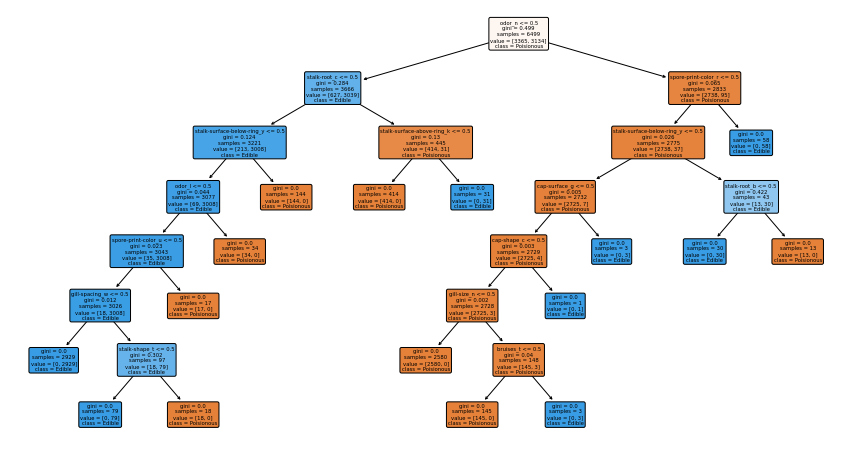

In [24]:
#plotting the decision tree
plt.figure(figsize=(15,8))
plot_tree(model,
         filled=True,
         rounded=True,
         class_names=["Poisionous","Edible"],
         feature_names=X_test.columns)